In [63]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

# Đếm số lượng theo placeId
pipeline = [
    {"$group": {"_id": "$placeId", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10}
]

result = list(collection.aggregate(pipeline))

for idx, item in enumerate(result, 1):
    print(f"{idx}. placeId: {item['_id']} - Số lượng: {item['count']}")


1. placeId: ChIJqSWgMcYvdTEReOwrjRd36W8 - Số lượng: 3382
2. placeId: ChIJD4OanpQvdTERh_u-NGsauZs - Số lượng: 2885
3. placeId: ChIJpdv9GNwpdTERpYUQo8r3RfA - Số lượng: 2501
4. placeId: ChIJmQa2NZUrdTERWx3Ui77zN0c - Số lượng: 2453
5. placeId: ChIJHZx_9nXVdDERkrdjx4J7zsg - Số lượng: 2359
6. placeId: ChIJmWI0qFzfdDERyycx50mNPk4 - Số lượng: 2177
7. placeId: ChIJEYXbxdoudTERmicNXLKNtCk - Số lượng: 2088
8. placeId: ChIJNbFrArYudTERGDWm6bnB-uM - Số lượng: 1787
9. placeId: ChIJC-nWiTYvdTERGMJvRSoZ2f4 - Số lượng: 1762
10. placeId: ChIJT9Pk5PsudTER3sQCMS5UC_0 - Số lượng: 1748


In [10]:
from pymongo import MongoClient
from gensim.utils import simple_preprocess

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

# Khởi tạo danh sách rỗng cho sentences và sentiment
sentences = []
sentiment = []

# Đặt placeId cụ thể bạn muốn lấy dữ liệu
place_id_to_query = "ChIJpdv9GNwpdTERpYUQo8r3RfA"

# Truy vấn dữ liệu từ MongoDB và gom chúng vào các danh sách
data_from_mongo = collection.find({"placeId": place_id_to_query}, {"sentences": 1, "sentiment": 1})
for data in data_from_mongo:
    sentences.extend(data["sentences"])  # Sử dụng extend để thêm tất cả các phần tử của list vào danh sách sentences
    sentiment.extend(data["sentiment"])

# Lọc các câu có sentiment là "negative"
negative_sentences = [sentences[i] for i in range(len(sentences)) if sentiment[i] == "negative"]
positive_sentences = [sentences[i] for i in range(len(sentences)) if sentiment[i] == "positive"]

# # Tiền xử lý văn bản
cleaned_negative_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in negative_sentences]
cleaned_positive_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in positive_sentences]


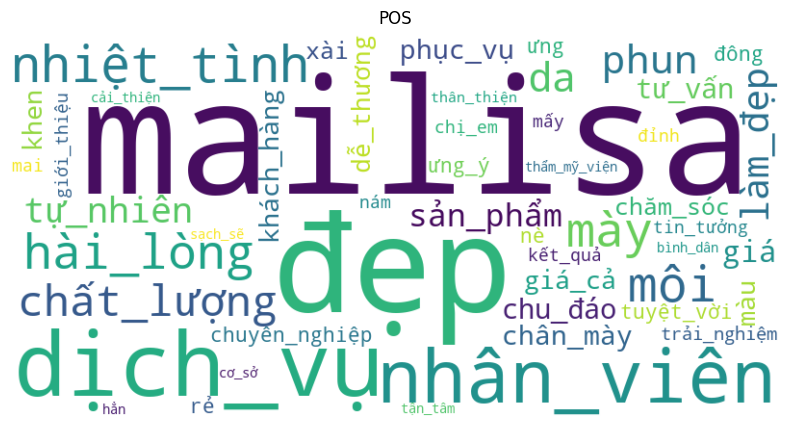

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Định nghĩa hàm combine_negation
def combine_negation(tokens):
    negation_words = {"không", "ko", "k", "kh", "không nên", "k nên", "ko nên", "chưa"}
    combined_tokens = []
    i = 0
    while i < len(tokens):
        if tokens[i].lower() in negation_words and i > 0 and i < len(tokens) - 1:
            combined_tokens.append(tokens[i - 1] + "_" + tokens[i] + "_" + tokens[i + 1])
            i += 1  # Bỏ qua từ tiếp theo vì đã kết hợp
        else:
            combined_tokens.append(tokens[i])
        i += 1
    return combined_tokens

# Tạo danh sách stopwords (đã có từ trước)
stop_words = set()

# Đọc từng dòng trong file stopwords.txt và thêm từ vào set stop_words
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    for line in file:
        word = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
        stop_words.add(word)

# Áp dụng hàm combine_negation cho mỗi câu
cleaned_sentences_combined = []
for sentence in cleaned_positive_sentences:
    tokens = nltk.word_tokenize(sentence)
    combined_tokens = combine_negation(tokens)
    cleaned_sentences_combined.append(' '.join(combined_tokens))

# Tiếp tục loại bỏ stop words từ các câu đã được kết hợp
words = []
for sentence in cleaned_sentences_combined:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token.lower() not in stop_words:
            words.append(token.lower())


# Đếm số lần xuất hiện của từng từ
word_counts = Counter(words)

# Tạo word cloud từ danh sách các từ và số lần xuất hiện
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_counts)

# Vẽ word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('POS')
plt.show()

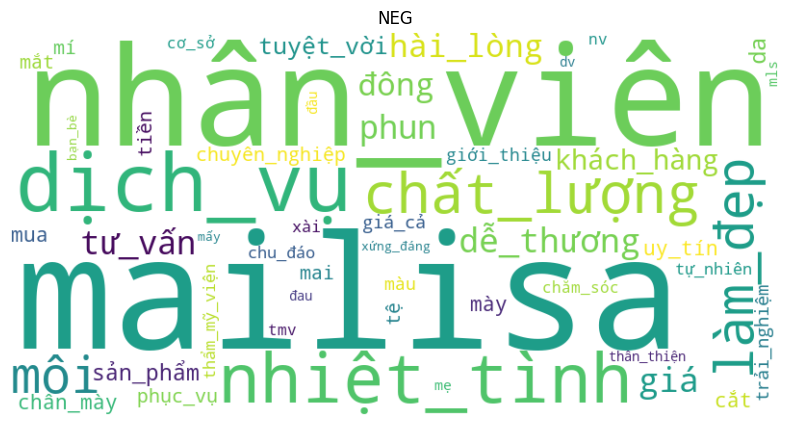

In [12]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Định nghĩa hàm combine_negation
def combine_negation(tokens):
    negation_words = {"không", "ko", "k", "kh", "không nên", "k nên", "ko nên"}
    combined_tokens = []
    i = 0
    while i < len(tokens):
        if tokens[i].lower() in negation_words and i > 0 and i < len(tokens) - 1:
            combined_tokens.append(tokens[i - 1] + "_" + tokens[i] + "_" + tokens[i + 1])
            i += 1  # Bỏ qua từ tiếp theo vì đã kết hợp
        else:
            combined_tokens.append(tokens[i])
        i += 1
    return combined_tokens

# Tạo danh sách stopwords (đã có từ trước)
stop_words = set()

# Đọc từng dòng trong file stopwords.txt và thêm từ vào set stop_words
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    for line in file:
        word = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
        stop_words.add(word)

# Áp dụng hàm combine_negation cho mỗi câu
cleaned_sentences_combined = []
for sentence in cleaned_negative_sentences:
    tokens = nltk.word_tokenize(sentence)
    combined_tokens = combine_negation(tokens)
    cleaned_sentences_combined.append(' '.join(combined_tokens))

# Tiếp tục loại bỏ stop words từ các câu đã được kết hợp
words = []
for sentence in cleaned_sentences_combined:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token.lower() not in stop_words:
            words.append(token.lower())


# Đếm số lần xuất hiện của từng từ
word_counts = Counter(words)

# Tạo word cloud từ danh sách các từ và số lần xuất hiện
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_counts)

# Vẽ word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEG')
plt.show()